### Customer Lifetime Value for Online retail data

Online retaildata is provided for which CLV is to be determined.

In [145]:
# Importing the required packages

import pandas as pd
import matplotlib as plt
import seaborn as sns

In [126]:
# Loading the data from csv file using pandas

retail_data = pd.read_csv("data\OnlineRetail.csv", encoding='unicode_escape')

In [127]:
# Looking at the data

retail_data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [128]:
# Checking the shape of the data

retail_data.shape

(541909, 8)

In [129]:
retail_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

From the data obtained our initial observation is that we have below features are crucial:
- Customer ID
- Invoice Date
- Quantity
- Unit Price

We plan to build the revenue metrics out of this data as below:
- Revenue = Active Customer Count * Order Count * Average Revenue per order

In [130]:
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])

In [131]:
retail_data['year']=pd.DatetimeIndex(retail_data.InvoiceDate).year
retail_data['month']=pd.DatetimeIndex(retail_data.InvoiceDate).month
retail_data['weekday_name'] = pd.DatetimeIndex(retail_data.InvoiceDate).weekday_name

In [132]:
retail_data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,weekday_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday


In [133]:
retail_data['revenue'] = retail_data.Quantity*retail_data.UnitPrice

In [134]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,weekday_name,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,20.34


In [153]:
monthly_revenue_data = retail_data.groupby(by=[retail_data.year, retail_data.month])['revenue'].sum().reset_index()

In [154]:
monthly_revenue_data = monthly_revenue_data.rename(columns={'revenue':'monthly_revenue'})

In [151]:
monthly_revenue_data['monthyear']=100*monthly_revenue_data.year+monthly_revenue_data.month

In [155]:
monthly_revenue_data

,year,month,monthly_revenue
0,2010,12,748957.020
1,2011,1,560000.260
2,2011,2,498062.650
3,2011,3,683267.080
4,2011,4,493207.121
5,2011,5,723333.510
6,2011,6,691123.120
7,2011,7,681300.111
8,2011,8,682680.510
9,2011,9,1019687.622


In [142]:
weekly_revenue_data = retail_data.groupby(by=[retail_data.year,retail_data.month,retail_data.weekday_name])['revenue'].sum().reset_index()

In [143]:
weekly_revenue_data

,year,month,weekday_name,revenue
0,2010,12,Friday,146559.56
1,2010,12,Monday,113981.27
2,2010,12,Sunday,56142.18
3,2010,12,Thursday,158870.07
4,2010,12,Tuesday,135000.28
...,...,...,...,...
73,2011,12,Monday,57751.32
74,2011,12,Sunday,24565.78
75,2011,12,Thursday,132828.73
76,2011,12,Tuesday,54228.37


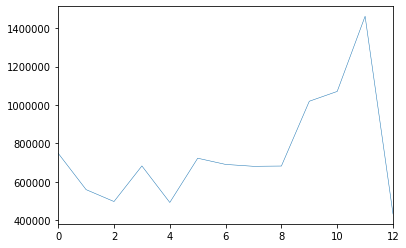

In [148]:
monthly_revenue_data['monthly_revenue'].plot(linewidth=0.5);